C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide
C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in true_divide


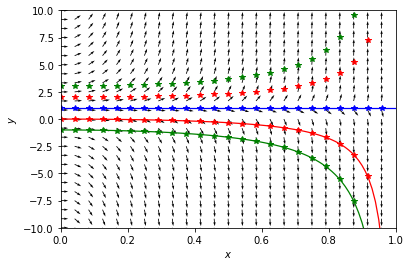

In [4]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= (-2*x[0]*(x[1]-1))/(x[0]**2 -1)   ## <- Here equation of dy/dx
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[0,0], [0,1], [0,-1]]
color=['r','b','g']


for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 1.25)
    

    

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(0,1,25),np.linspace(-10,10,25) )

V = (-2*X*(Y-1))/((X**2)-1)  ## <- Here equation of dy/dx


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)


##Analytical solution
xs = np.linspace(0,1,25)
y_exact = (1/((xs**2)-1)) +1
plt.plot(xs, y_exact, "*", color="r")
y_exact = (0/((xs**2)-1)) +1
plt.plot(xs, y_exact, "*", color="b")
y_exact = (2/((xs**2)-1)) +1
plt.plot(xs, y_exact, "*", color="g")
y_exact_wrong = (-1/((xs**2)-1)) +1
plt.plot(xs, y_exact_wrong, "*", color="r")
y_exact_wrong = (-2/((xs**2)-1)) +1
plt.plot(xs, y_exact_wrong, "*", color="g")


#S=np.array(np.real(Y))            Intento de plot del error
#y_diff = np.abs(y_exact - (S))
#plt.semilogy(xs1, y_diff, color = "r")

##Limits of the graph
plt.xlim([0,1])
plt.ylim([-10,10])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [13]:
import math
def k(x,y):
    k = (y * ((x**2)-1)) - 1## To check k's value with i.c
    return k

In [14]:
k(0,0)

-1

In [15]:
k(0,1)

-2

In [17]:
k(0,-1)

0